In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import codecs
%matplotlib inline

In [2]:
pwd

'D:\\GitHub\\DataAnalysis\\TaoNvlang'

In [110]:
path='model.json'
db=[json.loads(line) for line in open(path,encoding='utf-8')]
#db=json.load(open(path,encoding='utf-8'))
len(db)

40997

In [111]:
df=pd.DataFrame(db)

In [112]:
df=df.drop(['_id','userId','name'],axis=1)

In [113]:
df.head(5)

,BWH,bar,birthday,blood_type,city,exprience,height,job,school_major,shose,tag,weight
0,79-58-81,75B,"[公历, 01月10日]",,杭州市,"[05-10年, 先后为淘宝网店拍摄, 为多家摄影工作室拍摄内刊, 为, 《瑞丽服饰与美容》...",163.0CM,平面模特,"[北京农学院, 艺术设计]",36码,"[鞋包, 配饰, 泳衣, OL, 运动, 韩风, 小清新, 日系, 甜美风]",42.0KG
1,82-60-85,----,"[公历, 09月30日]",O型,杭州市,"[大家好, 我是模特, 景仪niki, 原新锐杂志签约模特, 从事拍摄有5年经验, 普拍：3...",166CM,平面模特,[],38码,"[O型, 平面模特, 韩版, 淑女, 甜美]",40KG
2,85-58-88,32C,"[农历, 09月03日]",,杭州市,"[美空网精英模特演员, 大连品牌服装我的组合, MYMIX, 形象代言模特；, 美空网推荐湖...",172CM,平面模特,[],38码,"[时尚, 大气, 日系, 甜美, 韩版, 欧美]",47KG
3,80-65-88,32B,"[公历, 07月12日]",,杭州市,[4年模特经验],168.0CM,平面模特,"[浙江艺术学校, 音乐]",38码,"[复古, 可爱, 日韩, 韩版, 韩系, 欧美, 甜美风, 淑女]",48.0KG
4,85-63-86,34C,"[公历, 08月16日]",AB型,广州市,"[平面广告拍摄, 淘宝服装拍摄]",168.0CM,平面模特,"[省工艺美校, 装潢]",36码,"[泳衣, 比基尼, 内衣, 欧美, 性感, 街头, 狮子座]",45.0KG


In [114]:
df.loc[df['bar']=='----','bar-1']=' '
df.loc[df['bar']!='----','bar-1']=df['bar'].str.findall(r'.*?([A-Z])')

In [115]:
df['bar-1']=df['bar-1'].str[0].replace(' ','')

In [116]:
df.head()

,BWH,bar,birthday,blood_type,city,exprience,height,job,school_major,shose,tag,weight,bar-1
0,79-58-81,75B,"[公历, 01月10日]",,杭州市,"[05-10年, 先后为淘宝网店拍摄, 为多家摄影工作室拍摄内刊, 为, 《瑞丽服饰与美容》...",163.0CM,平面模特,"[北京农学院, 艺术设计]",36码,"[鞋包, 配饰, 泳衣, OL, 运动, 韩风, 小清新, 日系, 甜美风]",42.0KG,B
1,82-60-85,----,"[公历, 09月30日]",O型,杭州市,"[大家好, 我是模特, 景仪niki, 原新锐杂志签约模特, 从事拍摄有5年经验, 普拍：3...",166CM,平面模特,[],38码,"[O型, 平面模特, 韩版, 淑女, 甜美]",40KG,
2,85-58-88,32C,"[农历, 09月03日]",,杭州市,"[美空网精英模特演员, 大连品牌服装我的组合, MYMIX, 形象代言模特；, 美空网推荐湖...",172CM,平面模特,[],38码,"[时尚, 大气, 日系, 甜美, 韩版, 欧美]",47KG,C
3,80-65-88,32B,"[公历, 07月12日]",,杭州市,[4年模特经验],168.0CM,平面模特,"[浙江艺术学校, 音乐]",38码,"[复古, 可爱, 日韩, 韩版, 韩系, 欧美, 甜美风, 淑女]",48.0KG,B
4,85-63-86,34C,"[公历, 08月16日]",AB型,广州市,"[平面广告拍摄, 淘宝服装拍摄]",168.0CM,平面模特,"[省工艺美校, 装潢]",36码,"[泳衣, 比基尼, 内衣, 欧美, 性感, 街头, 狮子座]",45.0KG,C


In [117]:
# plt.figure(figsize=(6,9))
# labels=['A','B','C','D','E','未知']
# color=['']
# explode=(0.05,0,0)
df.count()

BWH             40997
bar             40997
birthday        40997
blood_type      40997
city            40997
exprience       40997
height          40997
job             40997
school_major    40997
shose           40997
tag             40997
weight          40997
bar-1           32277
dtype: int64

In [125]:
df2=df.drop(df['bar-1']=='',axis=0)

In [146]:
df2=df.loc[(df['bar-1']=='A')|(df['bar-1']=='B')|(df['bar-1']=='C')|(df['bar-1']=='D')|(df['bar-1']=='E')|(df['bar-1']=='F')]

In [147]:
grouped=df2.groupby(['bar-1'])

In [148]:
grouped.size()

bar-1
A     6221
B    18211
C     4544
D      487
E       60
F       18
dtype: int64

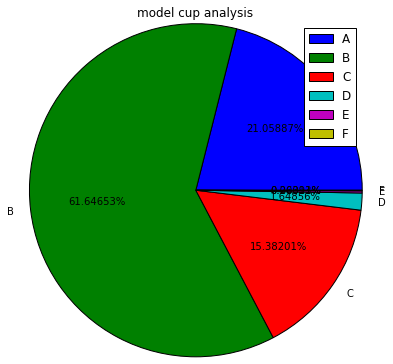

In [172]:
plt.figure(figsize=(6,6))
labels=['A','B','C','D','E','F']
colors=['b', 'g', 'r', 'c', 'm', 'y']
explode=[0,0,0,0,0.2,0.2]
plt.pie(grouped.size(),labels=labels,autopct='%1.5f%%')
plt.title(u'model cup analysis')
plt.axis('equal')
plt.legend()

In [151]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)
    Plot a pie chart.
    
    Call signature::
    
      pie(x, explode=None, labels=None,
          colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'),
          autopct=None, pctdistance=0.6, shadow=False,
          labeldistance=1.1, startangle=None, radius=None,
          counterclock=True, wedgeprops=None, textprops=None,
          center = (0, 0), frame = False )
    
    Make a pie chart of array *x*.  The fractional area of each
    wedge is given by x/sum(x).  If sum(x) <= 1, then the values
    of x give the fractional area directly and the array will not
    be normalized.  The wedges are plotted counterclockwise,
    by default starting from the x-axis.
    
    Keyword arguments:
    
